# A Guide to the National Structure Inventory (NSI) API in Python
Author: Mark Bauer

This notebook is intended to demonstrate how to use the National Structure Inventory (NSI) API in Python. To learn more about the NSI API, please visit the [API Reference Guide](https://www.hec.usace.army.mil/confluence/nsi/technicalreferences/latest/api-reference-guide) and the [NSI Documentation](https://www.hec.usace.army.mil/confluence/nsi).

In [1]:
# import libraries
import pandas as pd
import geopandas as gpd

For the bounding box argument, we will use the bounding box of Lower Manhattan, New York City.

![bbox](images/bbox.png)

For the FIPS code argument, we will use Manhattan borough.

In [2]:
path = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip"
gdf = gpd.read_file(path)

manhattan_gdf = gdf.loc[gdf['GEOID'] == '36061']

manhattan_gdf

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
989,36,061,00974129,0500000US36061,36061,New York,06,58680498,28551707,"MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ..."


<AxesSubplot: >

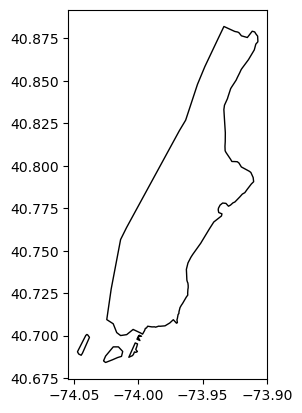

In [3]:
manhattan_gdf.plot(facecolor='None')

# Structures Endpoint
> The structures endpoint provides structure data to the user as a geojson feature collection (fc) or a feature stream (fs), the default is feature collection. The structure of a feature returned by the API can be seen in this geojson feature block. The type of return can be declared by the fmt directive (e.g. &fmt=fc)

Source: https://www.hec.usace.army.mil/confluence/nsi/technicalreferences/latest/api-reference-guide#id-.APIReferenceGuidev2022-Structures

## Structures By Bounding Box
Note: There are five points because you have to *close* the box.

In [4]:
# set variables
root_url = "https://nsi.sec.usace.army.mil/nsiapi/"
structures = "structures?bbox="
bbox = "-74.024840,40.699282,-74.024840,40.719809,-73.999305,40.699282,-73.999305,40.719809,-74.024840,40.699282"

# build full url and read as JSON in pandas
url = f"{root_url}{structures}{bbox}"
df = pd.read_json(url)

# preview data
print(df.shape)
df.head()

(6301, 2)


,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."


In [5]:
# confirm records are only feature collections
df['type'].value_counts()

FeatureCollection    6301
Name: type, dtype: int64

In [6]:
# preview feature fields
df['features'].head()

0    {'type': 'Feature', 'geometry': {'type': 'Poin...
1    {'type': 'Feature', 'geometry': {'type': 'Poin...
2    {'type': 'Feature', 'geometry': {'type': 'Poin...
3    {'type': 'Feature', 'geometry': {'type': 'Poin...
4    {'type': 'Feature', 'geometry': {'type': 'Poin...
Name: features, dtype: object

In [7]:
# normalize JSON to a flat table
df = pd.json_normalize(df['features'])

print(df.shape)
df.head()

(6301, 32)


,type,geometry.type,geometry.coordinates,properties.fd_id,properties.bid,properties.occtype,properties.st_damcat,properties.bldgtype,properties.found_type,properties.cbfips,...,properties.val_vehic,properties.source,properties.med_yr_blt,properties.firmzone,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m
0,Feature,Point,"[-74.008328, 40.706836]",554665148,87G7PX4R+PMM-0-0-0-0,RES1-1SWB,RES,W,B,360610007001003,...,27000,P,1939,None,0.25,0.03,-74.008328,40.706836,21.934981,6.685782
1,Feature,Point,"[-74.018638, 40.70607]",554076983,87G7PX4J+CGH-14-14-16-12,COM8,COM,W,I,360610317044001,...,45000,P,1997,None,0.25,0.03,-74.018638,40.706070,11.275930,3.436903
2,Feature,Point,"[-74.018789, 40.705926]",554076985,87G7PX4J+9FG-7-6-7-6,COM8,COM,S,C,360610317044001,...,45000,P,1997,None,0.25,0.03,-74.018789,40.705926,11.673391,3.558049
3,Feature,Point,"[-74.018777, 40.706243]",554076986,87G7PX4J+FFX-5-5-4-5,COM8,COM,S,C,360610317044001,...,45000,P,1997,None,0.25,0.03,-74.018777,40.706243,11.516893,3.510349
4,Feature,Point,"[-74.018781, 40.706251]",554076989,87G7PX4J+GF5-1-1-2-2,COM8,COM,W,I,360610317044001,...,45000,P,1997,None,0.25,0.03,-74.018781,40.706251,11.516893,3.510349


## Structures By FIPS
FIPS codes: https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt

We will use Manhattan's FIPs code: 36063.

In [8]:
root_url = "https://nsi.sec.usace.army.mil/nsiapi/"
structures = "structures?fips="
fips = "36061"

url = f"{root_url}{structures}{fips}"
df = pd.read_json(url)

print(df.shape)
df.head()

(163033, 2)


,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."


In [9]:
df = pd.json_normalize(df['features'])

print(df.shape)
df.head()

(163033, 32)


,type,geometry.type,geometry.coordinates,properties.fd_id,properties.bid,properties.occtype,properties.st_damcat,properties.bldgtype,properties.found_type,properties.cbfips,...,properties.val_vehic,properties.source,properties.med_yr_blt,properties.firmzone,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m
0,Feature,Point,"[-73.99841, 40.714656]",554079197,87G8P272+VJ8-1-1-2-1,RES3C,RES,W,B,360610029003003,...,135000,X,1939,None,0.25,0.03,-73.998410,40.714656,30.833406,9.398022
1,Feature,Point,"[-73.997441, 40.714627]",554079269,87G8P273+V23-2-5-3-4,RES3A,RES,M,S,360610029003004,...,27000,X,1939,None,0.25,0.03,-73.997441,40.714627,36.259209,11.051806
2,Feature,Point,"[-74.01107, 40.719515]",554096858,87G7PX9Q+RH3-1-1-1-1,IND6,IND,S,S,360610039002001,...,36000,X,1975,None,0.25,0.03,-74.011070,40.719515,9.820276,2.993220
3,Feature,Point,"[-73.997247, 40.721022]",554126006,87G8P2C3+C42-8-6-8-7,RES3A,RES,W,S,360610041006002,...,54000,X,1939,None,0.25,0.03,-73.997247,40.721022,32.165671,9.804096
4,Feature,Point,"[-73.984015, 40.718307]",554175328,87G8P298+89H-10-11-11-11,EDU1,PUB,S,S,360610014022000,...,234000,X,1959,None,0.25,0.03,-73.984015,40.718307,23.983126,7.310057


# Stats Endpoint

> The stats endpoint provides access to a set of statistics based only on the bbox argument.

Source: https://www.hec.usace.army.mil/confluence/nsi/technicalreferences/latest/api-reference-guide#id-.APIReferenceGuidev2022-Stats

In [12]:
root_url = "https://nsi.sec.usace.army.mil/nsiapi/"
stats = "stats?bbox="
bbox = "-74.024840,40.699282,-74.024840,40.719809,-73.999305,40.699282,-73.999305,40.719809,-74.024840,40.699282"

# JSON comes as a Series, so we have to unpack the columns
url = f"{root_url}{stats}{bbox}"
df = pd.read_json(url, typ='series')

print(df.shape)
df.head()

(20,)


num_structures     6301.000000
yrbuilt_min           0.000000
yrbuilt_max        2017.000000
num_story_mean        1.468497
resunits_sum      14366.000000
dtype: float64

In [13]:
# preview full series
df

num_structures    6.301000e+03
yrbuilt_min       0.000000e+00
yrbuilt_max       2.017000e+03
num_story_mean    1.468497e+00
resunits_sum      1.436600e+04
empnum_sum        1.333500e+04
students_sum      3.038000e+03
sqft_mean         2.926842e+03
sqft_sum          1.844203e+07
pop2amu65_sum     3.000800e+04
pop2amo65_sum     5.476000e+03
pop2pmu65_sum     1.405450e+05
pop2pmo65_sum     1.227700e+04
val_struct_sum    4.282322e+09
val_cont_sum      3.107250e+09
val_vehic_sum     5.123700e+08
med_yr_blt_min    1.939000e+03
med_yr_blt_max    2.017000e+03
ground_elv_max    4.463640e+01
ground_elv_min   -5.314961e+00
dtype: float64

In [14]:
# pushing into a dataframe and reset index, rename columns
df = (
    pd.DataFrame(df)
    .reset_index()
    .rename(columns={"index":"stat", 0:"value"})
)

print(df.shape)
df

(20, 2)


,stat,value
0,num_structures,6.301000e+03
1,yrbuilt_min,0.000000e+00
2,yrbuilt_max,2.017000e+03
3,num_story_mean,1.468497e+00
4,resunits_sum,1.436600e+04
5,empnum_sum,1.333500e+04
6,students_sum,3.038000e+03
7,sqft_mean,2.926842e+03
8,sqft_sum,1.844203e+07
9,pop2amu65_sum,3.000800e+04


In [15]:
# confirm values are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stat    20 non-null     object 
 1   value   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes
